In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import CovidVAX_specific_utils
import GeneModules

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
# warnings.simplefilter("ignore")


import scanpy as sc

In [2]:
ct = 'Monocyte CD14-2'
adata = sc.read_h5ad(f'{ct}.h5ad')

In [3]:
adata.obs['subsets'] = pd.Categorical(adata.obs['new_subset_annotations_2'].map({
    'Monocyte CD14': 'CD14 ISG Low',
    'Monocyte CD14 ISG 1': 'CD14 ISG High',
    'Monocyte CD14 ISG 2': 'CD14 ISG High',
    'Monocyte CD14 ISG (Low)': 'CD14 ISG Dim',
    'Monocyte CD14 ISG Inflamm.': 'CD14 ISG High',
}),  categories=['CD14 ISG Low', 'CD14 ISG Dim', 'CD14 ISG High'])

In [4]:
adata_vc = utils.clean_visits(adata)

In [5]:
pbmc = sc.read_h5ad('adata-rna-adt-joint-1-annoted.h5ad')
pbmc = pbmc[pbmc.obs['celltypes'] != 'Trash'].copy()
pbmc = pbmc[pbmc.obs.is_cv].copy()

In [15]:
def cell_proportions_longitudinal_box_plot_2(pbmc_vc, celltype_name, annots_col, figsize = (4, 4), color = None, title = ''):
    df = pbmc_vc.obs.loc[pbmc_vc.obs[annots_col] == celltype_name, ['person', 'Visit']].value_counts()
    df = 100*df/pbmc_vc.obs[['person', 'Visit']].value_counts()
    # df = df.reindex(index_mRNA, fill_value=0)
    df = df.reset_index()
    df['Visit'] = pd.Categorical(df['Visit'], categories = pbmc_vc.obs['Visit'].cat.categories)

    fig, ax = plt.subplots(figsize = figsize)
    y_max = df['count'].max()
    y_min = df['count'].min()
    df['vax'] = df['person'].map(covax_constants.donor_to_vax_dict)

    # df = df.sort_values(by = 'person')
    sns.boxplot(df, x='Visit', y='count', fill=True, color = color, showfliers=False, dodge=False, width=0.7, saturation = 1, ax = ax)
    strip = sns.stripplot(df, x='Visit', y='count', jitter=True, size=6, legend=True, ax=ax, hue = 'vax', dodge=True, palette=covax_constants.vax_colors)

    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(y_min*0.90, y_max*1.05)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, color = color, fontsize= 18)
        
    ax.set_ylabel('Cell Percentages')
    ax.set_xlabel('')

    ax.get_legend().remove()
        
    fig.suptitle(f'{celltype_name} Percentages Per Donor/Visit', fontsize = 12);
    return fig

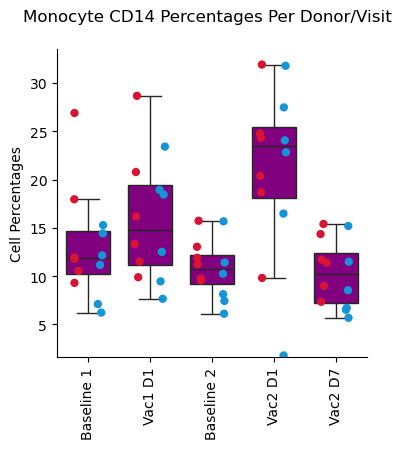

In [19]:
fig = cell_proportions_longitudinal_box_plot_2(pbmc[pbmc.obs['Vaccine']!='J&J'], 'Monocyte CD14', 'celltypes', color = 'purple');
my_plotting.savefig_png_eps(fig, 'cd14_monocyte_long_percentages_within_pbmc', make_folder=True, use_timestamp=False)

In [ ]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()
for vax in ['J&J', 'Moderna', 'Pfizer']:
    d1 = df.query(f"Vaccine == '{vax}' and Visit == 'Vac1 D1'").set_index('person')['count']
    bl = df.query(f"Vaccine == '{vax}' and Visit == 'Baseline 1'").set_index('person')['count']

    print(vax)
    d1_fcs = (d1/bl).sort_values()
    display(d1_fcs.describe())
    res = stats.wilcoxon(bl, d1, alternative='less')
    # res = stats.ttest_rel(bl, d1, alternative='less')
    print(d1>bl)
    display(res)

In [ ]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

d1 = df.query(f"Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
bl = df.query(f"Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
d1_fcs = (d1/bl).sort_values()
display(d1_fcs.describe())

res = stats.wilcoxon(bl, d1, alternative='less')
display(res)

In [ ]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()
for vax in ['Moderna', 'Pfizer']:
    d1 = df.query(f"Vaccine == '{vax}' and Visit == 'Vac2 D1'").set_index('person')['count']
    bl = df.query(f"Vaccine == '{vax}' and Visit == 'Baseline 1'").set_index('person')['count']

    print(vax)
    d1_fcs = (d1/bl).sort_values()
    display(d1_fcs.describe())
    res = stats.wilcoxon(bl, d1, alternative='less')
    # res = stats.ttest_rel(bl, d1, alternative='less')
    print(d1>bl)
    display(res)

In [18]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

d1 = df.query(f"Vaccine != 'J&J' and Visit == 'Vac2 D1'").set_index('person')['count']
bl = df.query(f"Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
d1_fcs = (d1/bl).sort_values()
display(d1_fcs.describe())

res = stats.wilcoxon(bl, d1, alternative='less')
display(res)

count    12.000000
mean      1.720682
std       0.745083
min       0.252807
25%       1.406791
50%       1.891194
75%       2.032174
max       2.845700
Name: count, dtype: float64

WilcoxonResult(statistic=6.0, pvalue=0.00341796875)

In [9]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

d1 = df.query(f"Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
bl = df.query(f"Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
d1_fcs = (d1/bl).sort_values()
display(d1_fcs.describe())

res = stats.wilcoxon(bl, d1, alternative='less')
display(res)

count    12.000000
mean      1.253211
std       0.235641
min       0.839658
25%       1.103909
50%       1.233319
75%       1.380651
max       1.652646
Name: count, dtype: float64

WilcoxonResult(statistic=5.0, pvalue=0.00244140625)

In [21]:
fc = df[(df['Vaccine']=='J&J') & (df['Visit']=='Vac1 D1')].set_index('person')['count'] /\
    df[(df['Vaccine']=='J&J') & (df['Visit']=='Baseline 1')].set_index('person')['count'] 
print('J&J CD14 Monoc FC:', round(fc.mean(), 1))

fc = df[(df['Vaccine']!='J&J') & (df['Visit']=='Vac1 D1')].set_index('person')['count'] /\
    df[(df['Vaccine']!='J&J') & (df['Visit']=='Baseline 1')].set_index('person')['count'] 
print('mRNA CD14 Monoc FC - D1:', round(fc.mean(), 1))

fc = df[(df['Vaccine']!='J&J') & (df['Visit']=='Vac2 D1')].set_index('person')['count'] /\
    df[(df['Vaccine']!='J&J') & (df['Visit']=='Baseline 1')].set_index('person')['count'] 
print('mRNA CD14 Monoc FC - V2D1:', round(fc.mean(), 1))

J&J CD14 Monoc FC: 2.7
mRNA CD14 Monoc FC - D1: 1.3
mRNA CD14 Monoc FC - V2D1: 1.7


In [ ]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()
for vax in ['Moderna', 'Pfizer']:
    d1 = df.query(f"Vaccine == '{vax}' and Visit == 'Vac2 D1'").set_index('person')['count']
    bl = df.query(f"Vaccine == '{vax}' and Visit == 'Baseline 1'").set_index('person')['count']
    
    res = stats.wilcoxon(bl, d1, alternative='less')
    # res = stats.ttest_rel(bl, d1, alternative='less')
    print(d1>bl)
    display(res)

In [ ]:
i = (pbmc.obs['Visit'].isin({'Baseline 1', 'Vac1 D1', 'Vac2 D1'})) & (pbmc.obs['Vaccine'].isin({'Moderna', 'Pfizer'}))
fig = cell_proportions_longitudinal_box_plot_all_combined(pbmc[i], 'Monocyte CD14', 'celltypes')

df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

bl = df.query("Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')

print(d1>bl)
display(res)


bl = df.query("Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac2 D1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')

print(d1>bl)
display(res)


In [ ]:
i = (pbmc.obs['Visit'].isin({'Baseline 1', 'Vac1 D1'})) & (pbmc.obs['Vaccine'].isin({'Moderna', 'Pfizer'}))
fig = cell_proportions_longitudinal_box_plot_all_combined(pbmc[i], 'Monocyte CD14', 'celltypes')

df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
bl = df.query("Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')

print(d1>bl)
display(res)

In [ ]:
i = (pbmc.obs['Visit'].isin({'Vac1 D1', 'Vac2 D1'})) & (pbmc.obs['Vaccine'].isin({'Moderna', 'Pfizer'}))
fig = cell_proportions_longitudinal_box_plot_all_combined(pbmc[i], 'Monocyte CD14', 'celltypes')

df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

bl = df.query("Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac2 D1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')

print(d1>bl)
display(res)

In [ ]:
i = (pbmc.obs['Visit'].isin({'Baseline 1', 'Vac2 D1'})) & (pbmc.obs['Vaccine'].isin({'Moderna', 'Pfizer'}))
fig = cell_proportions_longitudinal_box_plot_all_combined(pbmc[i], 'Monocyte CD14', 'celltypes')

df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()

d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac2 D1'").set_index('person')['count']
bl = df.query("Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')

print(d1>bl)
display(res)

In [ ]:
df = pbmc.obs.loc[pbmc.obs['celltypes']=='Monocyte CD14', ['Vaccine', 'person', 'Visit']].value_counts()
df = df/pbmc.obs[['Vaccine', 'person', 'Visit']].value_counts()
df = df.reset_index()
# display(df)

for vax in ['J&J', 'Moderna', 'Pfizer']:
    d1 = df.query(f"Vaccine == '{vax}' and Visit == 'Vac1 D1'").set_index('person')['count']
    bl = df.query(f"Vaccine == '{vax}' and Visit == 'Baseline 1'").set_index('person')['count']
    
    res = stats.wilcoxon(bl, d1, alternative='less')
    # res = stats.ttest_rel(bl, d1, alternative='less')
    print(d1>bl)
    display(res)


# d1 = df.query("Vaccine == 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
# bl = df.query("Vaccine == 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
# res = stats.wilcoxon(bl, d1, alternative='less')
# print(d1>bl)
# display(res)


d1 = df.query("Vaccine != 'J&J' and Visit == 'Vac1 D1'").set_index('person')['count']
bl = df.query("Vaccine != 'J&J' and Visit == 'Baseline 1'").set_index('person')['count']
res = stats.wilcoxon(bl, d1, alternative='less')
# res = stats.ttest_rel(bl, d1, alternative='less')

# d1 = df.query("Visit == 'Vac1 D1'").set_index('person')['count']
# bl = df.query("Visit == 'Baseline 1'").set_index('person')['count']
# res = stats.wilcoxon(bl, d1, alternative='less')
# res = stats.ttest_rel(bl, d1, alternative='less')

print(d1>bl)
display(res)